
## Create Cellular Automaton
Ben Phillips ([website](https://benjaminphillips22.github.io))

At each step, one colour is given the opportunity to expand. The less frequent the colour is on the board, the more likely it will be selected to expand.

load packages

In [28]:
import numpy as np
import imageio

import matplotlib.pyplot as plt
from matplotlib import colors
plt.style.use(style='seaborn')
%matplotlib inline

Function to stochastically update neighbours

In [23]:
def update_neighbours(grid, i, j, turn, prob=0.25):

    # indices that can change
    up = [np.mod(i-1, grid.shape[1]), j]
    down = [np.mod(i+1, grid.shape[1]), j]
    left = [i, np.mod(j-1, grid.shape[0])]
    right = [i, np.mod(j+1, grid.shape[0])]
    
    def change(pos, turn, prob):
        if np.random.sample() < prob:
            grid[pos[0]][pos[1]] = turn
    
    change(up, turn, prob)
    change(down, turn, prob)
    change(left, turn, prob)
    change(right, turn, prob)

Settings

In [125]:
rows = 10
cols = 10
scenes = 200
grid_dev_num = 0

# create discrete colormap
cmap = colors.ListedColormap(['black', 'lightcoral', 'skyblue'])
bounds = [-1, 0.1, 1.1, 2.1]
norm = colors.BoundaryNorm(bounds, cmap.N)

Insert one of each colour and watch them compete

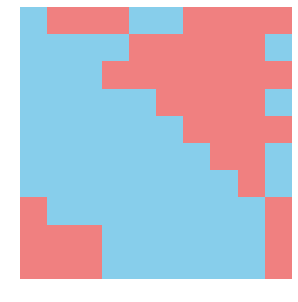

In [102]:
# set seed
np.random.seed(44)

#grid space
grid = np.full(shape=[rows, cols], fill_value=0)

# insert randomly one of each colour
x1, x2 = np.random.choice(range(rows), size=2, replace=False)
y1, y2 = np.random.choice(range(cols), size=2, replace=False)

# start with two filled cells
grid[x1, y1] = 1
grid[x2, y2] = 2

# red:blue split ratio. 
# Less than 0.5 means more blues are present
# More than 0.5 means more reds are present
split_ratio = np.sum(grid==1)/(np.sum(grid==1)+np.sum(grid==2))

# create new plot
fig, ax = plt.subplots(figsize=(5, 5))
my_images = []

for s in range(scenes):
    
    x = np.random.sample()  # decide who gets to update
    
    if x < split_ratio:
        turn = 2  # blues turn
    else:
        turn = 1  # reds turn

    map_turn_tuple = np.where(grid==turn)  # update grid
    
    for i, j in zip(map_turn_tuple[0], map_turn_tuple[1]):
        update_neighbours(grid, i, j, turn)

    ax.imshow(grid, cmap=cmap, norm=norm)
    ax.grid(False)
    ax.axis('off')
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
    #update split_ratio
    split_ratio = np.sum(grid==1)/(np.sum(grid==1)+np.sum(grid==2))
    
# save
imageio.mimsave('./ca_1.gif', my_images, fps=10)


Start with an already filled in grid

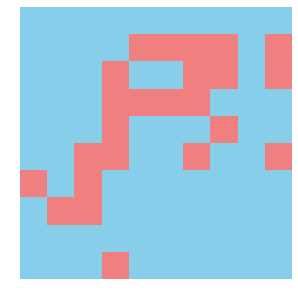

In [126]:
# set seed
np.random.seed(44)

#grid space
grid = np.full(shape=[rows, cols], fill_value=0)

# insert colours
for x in range(rows):
    for y in range(cols):
        grid[x, y] = np.random.choice([1, 2])

# red:blue split ratio. 
# Less than 0.5 means more blues are present
# More than 0.5 means more reds are present
split_ratio = np.sum(grid==1)/(np.sum(grid==1)+np.sum(grid==2))

# create new plot
fig, ax = plt.subplots(figsize=(5, 5))
my_images = []

for s in range(scenes):
    
    x = np.random.sample()  # decide who gets to update
    
    if x < split_ratio:
        turn = 2  # blues turn
    else:
        turn = 1  # reds turn

    map_turn_tuple = np.where(grid==turn)  # update grid
    
    for i, j in zip(map_turn_tuple[0], map_turn_tuple[1]):
        update_neighbours(grid, i, j, turn)

    ax.imshow(grid, cmap=cmap, norm=norm)
    ax.grid(False)
    ax.axis('off')
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
    #update split_ratio
    split_ratio = np.sum(grid==1)/(np.sum(grid==1)+np.sum(grid==2))
    
# save
imageio.mimsave('./ca_2.gif', my_images, fps=10)
